In [1]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders


import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Path where our data is located

base_path = "C:/Users/Dell/Downloads/GSNSL/"

# Dictionary to save our 35 classes
categories = {  0: "क",
                1: "क्ष",
                2: "ख",
                3: "ग",
                4: "घ",
                5: "ङ",
                6: "च",
                7: "छ",
                8: "ज",
                9: "ज्ञ",
                10: "झ",
                11: "ञ",
                12: "ट",
                13: "ठ",
                14: "ड",
                15: "ढ",
                16: "ण",
                17: "त",
                18: "त्र",
                19: "थ",
                20: "द",
                21: "ध",
                22: "न",
                23: "प",
                24: "फ",
                25: "ब",
                26: "भ",
                27: "म",
                28: "य",
                29: "र",
                30: "ल",
                31: "व",
                32: "श",
                33: "ष",
                34: "स",
                35: "ह"
            }


def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# List containing all the filenames in the dataset
filenames_list = []
# List to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df

,filename,category
0,frame_25 - Copy (2).jpg,15
1,36 (32) - Copy.jpg,32
2,1 (36) - Copy.jpg,25
3,4 (17).jpg,27
4,37 (25) - Copy.jpg,32
...,...,...
27005,frame_1.jpg,13
27006,36 (70) - Copy.jpg,6
27007,35 (24) - Copy.jpg,18
27008,35 (16) - Copy - Copy - Copy.jpg,5


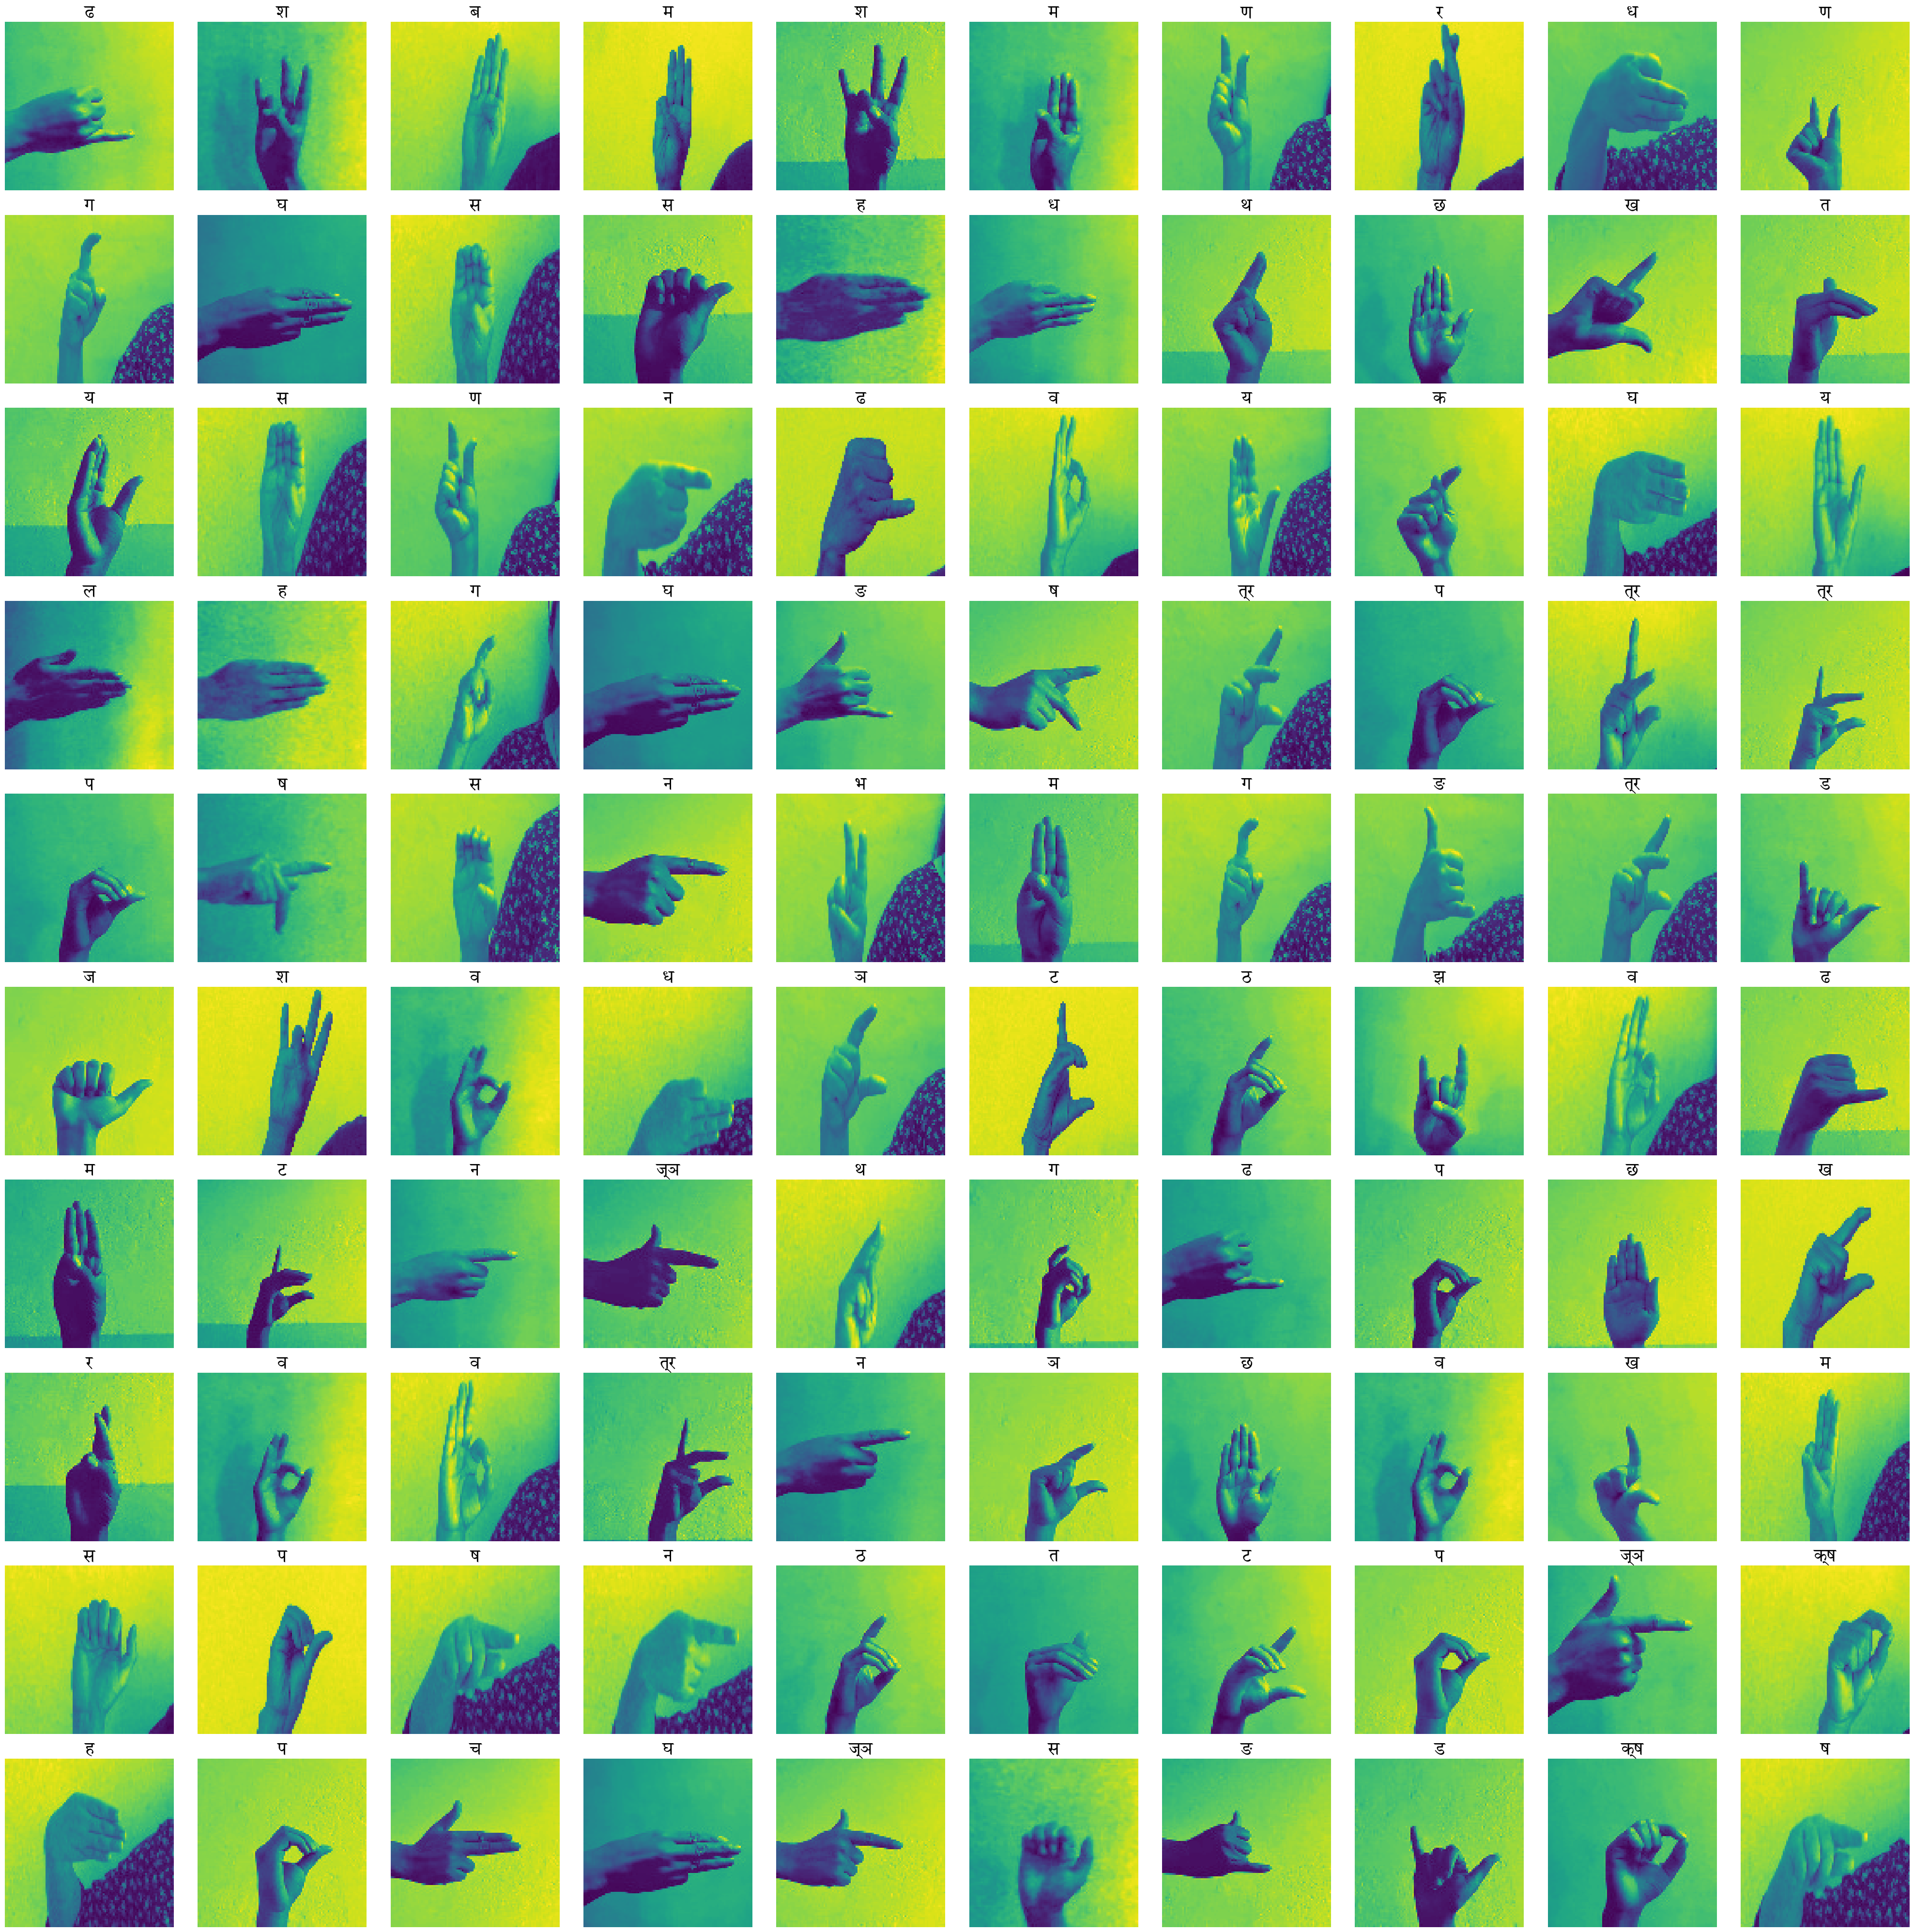

In [4]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import os

font_path = 'c:/Windows/Fonts/kokila.ttf'  # Replace with the actual file path of the Kokila font on your system
custom_font = FontProperties(fname=font_path, size=35)

plt.figure(figsize=(40, 40))

for i in range(100):
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10, 10, i + 1)

    # Title with custom 'Kokila' font for Nepali script
    plt.title(categories[df.category[i]], fontproperties=custom_font)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [11]:
splitfolders.ratio('C:/Users/Dell/Downloads/GSNSL/',output='C:/Users/Dell/Downloads/GSNSLdatasets/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 27010 files [02:17, 196.21 files/s]


In [5]:
datagen = ImageDataGenerator(rescale=1.0 / 255,
                            #  rotation_range=15,
                            #  width_shift_range=0.1,
                            #  height_shift_range=0.1,
                            #  shear_range=0.1,
                            #  zoom_range=0.1,
                            #  horizontal_flip=True,
                            #  fill_mode='nearest'
                             )


In [6]:
train_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/train/'
val_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/val/'
test_path = 'C:/Users/Dell/Downloads/GSNSLdatasets/test/'

# Define hyperparameters and parameters
batch_size = 16
image_size = 100
img_channel = 1
num_classes = 36
learning_rate = 0.01


In [7]:
train_data = datagen.flow_from_directory(directory=train_path,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                         color_mode='grayscale',
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory=val_path,
                                       target_size=(image_size, image_size),
                                       batch_size=batch_size,
                                       color_mode='grayscale',
                                       class_mode='categorical')

test_data = datagen.flow_from_directory(directory=test_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch_size,
                                        color_mode='grayscale',
                                        class_mode='categorical',
                                        shuffle=False)

Found 21608 images belonging to 36 classes.
Found 2701 images belonging to 36 classes.
Found 2701 images belonging to 36 classes.


In [8]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(image_size, image_size, img_channel)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
# # Define a simple CNN model for smaller images
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(36, activation='softmax'))

# model.summary()

# def create_model():
#     model = Sequential([
#         Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1)),
#         MaxPooling2D(pool_size=(2, 2)),
#         BatchNormalization(),

#         Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         BatchNormalization(),

#         Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         BatchNormalization(),

#         Flatten(),

#         Dense(units=512, activation='relu'),
#         Dropout(0.5),
#         Dense(units=256, activation='relu'),
#         Dropout(0.5),
#         Dense(units=36, activation='softmax')
#     ])

#     return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 50, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                        

In [9]:
# model = create_model()

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 128)       0         
 g2D)                                                            
                                                        

In [9]:
# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.6, verbose=1)


In [11]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=15,
                    callbacks=[early_stopping, reduce_learning_rate],
                    verbose=1)

Epoch 1/15
1351/1351 [==============================] - 2142s 2s/step - loss: 3.5816 - accuracy: 0.0298 - val_loss: 3.5799 - val_accuracy: 0.0407 - lr: 0.0100
Epoch 2/15
1351/1351 [==============================] - 2126s 2s/step - loss: 3.5516 - accuracy: 0.0506 - val_loss: 3.4703 - val_accuracy: 0.1140 - lr: 0.0100
Epoch 3/15
1351/1351 [==============================] - 2077s 2s/step - loss: 3.2390 - accuracy: 0.1128 - val_loss: 2.8649 - val_accuracy: 0.2103 - lr: 0.0100
Epoch 4/15
1351/1351 [==============================] - 2082s 2s/step - loss: 1.9973 - accuracy: 0.4172 - val_loss: 0.3849 - val_accuracy: 0.8978 - lr: 0.0100
Epoch 5/15
1351/1351 [==============================] - 2054s 2s/step - loss: 0.4425 - accuracy: 0.8725 - val_loss: 0.0468 - val_accuracy: 0.9915 - lr: 0.0100
Epoch 6/15
1351/1351 [==============================] - 2005s 1s/step - loss: 0.1597 - accuracy: 0.9558 - val_loss: 0.0169 - val_accuracy: 0.9952 - lr: 0.0100
Epoch 7/15
1351/1351 [========================

In [12]:
model.save('12GSNSLmodel.h5')


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

# Load the saved model
model = load_model('E:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/d7NSLmodel.h5')
# Generate predictions for the test data
y_pred_probs = model.predict(test_data)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true labels from the test data generator
y_true = test_data.classes

# Generate a classification report
class_report = classification_report(y_true, y_pred_classes)

# Print the classification report
print("Classification Report:\n", class_report)



169/169 [==============================] - 19s 111ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75
           4       0.97      0.96      0.97        75
           5       0.96      0.97      0.97        75
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        75
           9       1.00      1.00      1.00        75
          10       1.00      0.99      0.99        76
          11       0.99      1.00      0.99        75
          12       1.00      1.00      1.00        75
          13       1.00      1.00      1.00        75
          14       1.00      1.00      1.00        75
          15       1.00      1.00      1.00        75

169/169 [==============================] - 19s 115ms/step


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2359 (\N{DEVANAGARI LETTER SSA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Pyt

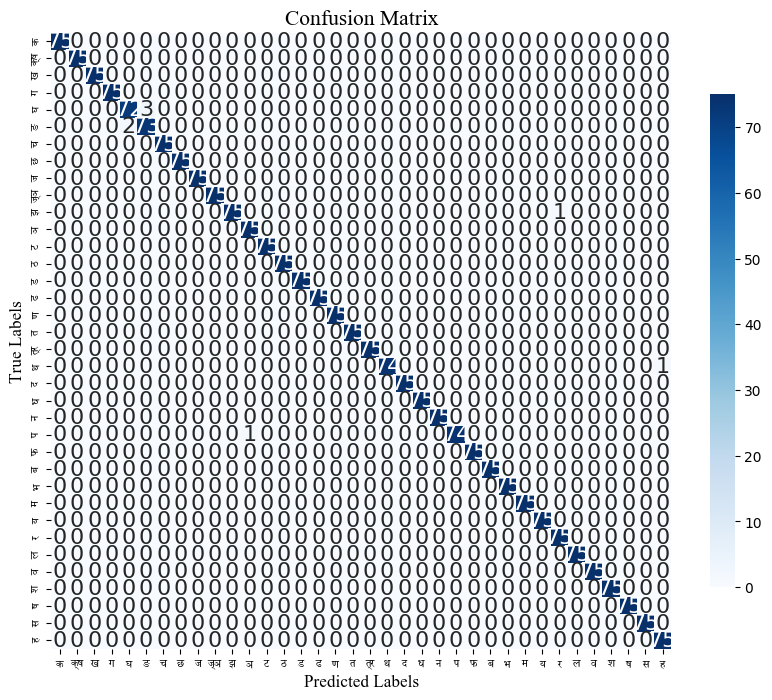

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib.font_manager import FontProperties

# Assuming you have a loaded model
# Assuming you have a test data generator (test_data) for evaluation
# Replace this with your actual test data generator

# Generate predictions for the test data
y_pred_probs = model.predict(test_data)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true labels from the test data generator
y_true = test_data.classes

# Generate a confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Set Nepali Kokila font
nepali_kokila_font = FontProperties(fname='C:/Windows/Fonts/kokila.ttf')

# Plot the confusion matrix with Nepali Kokila font
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                      xticklabels=test_data.class_indices.keys(),
                      yticklabels=test_data.class_indices.keys(),
                      annot_kws={"size": 16},  # Adjust the font size for annotations
                      cbar_kws={"shrink": 0.8})  # Adjust the colorbar size

# Set Nepali Kokila font for tick labels
for tick_label in heatmap.get_xticklabels():
    tick_label.set_fontproperties(nepali_kokila_font)

for tick_label in heatmap.get_yticklabels():
    tick_label.set_fontproperties(nepali_kokila_font)

plt.title('Confusion Matrix', fontproperties=nepali_kokila_font, fontsize=20)
plt.xlabel('Predicted Labels', fontproperties=nepali_kokila_font, fontsize=16)
plt.ylabel('True Labels', fontproperties=nepali_kokila_font, fontsize=16)
plt.show()


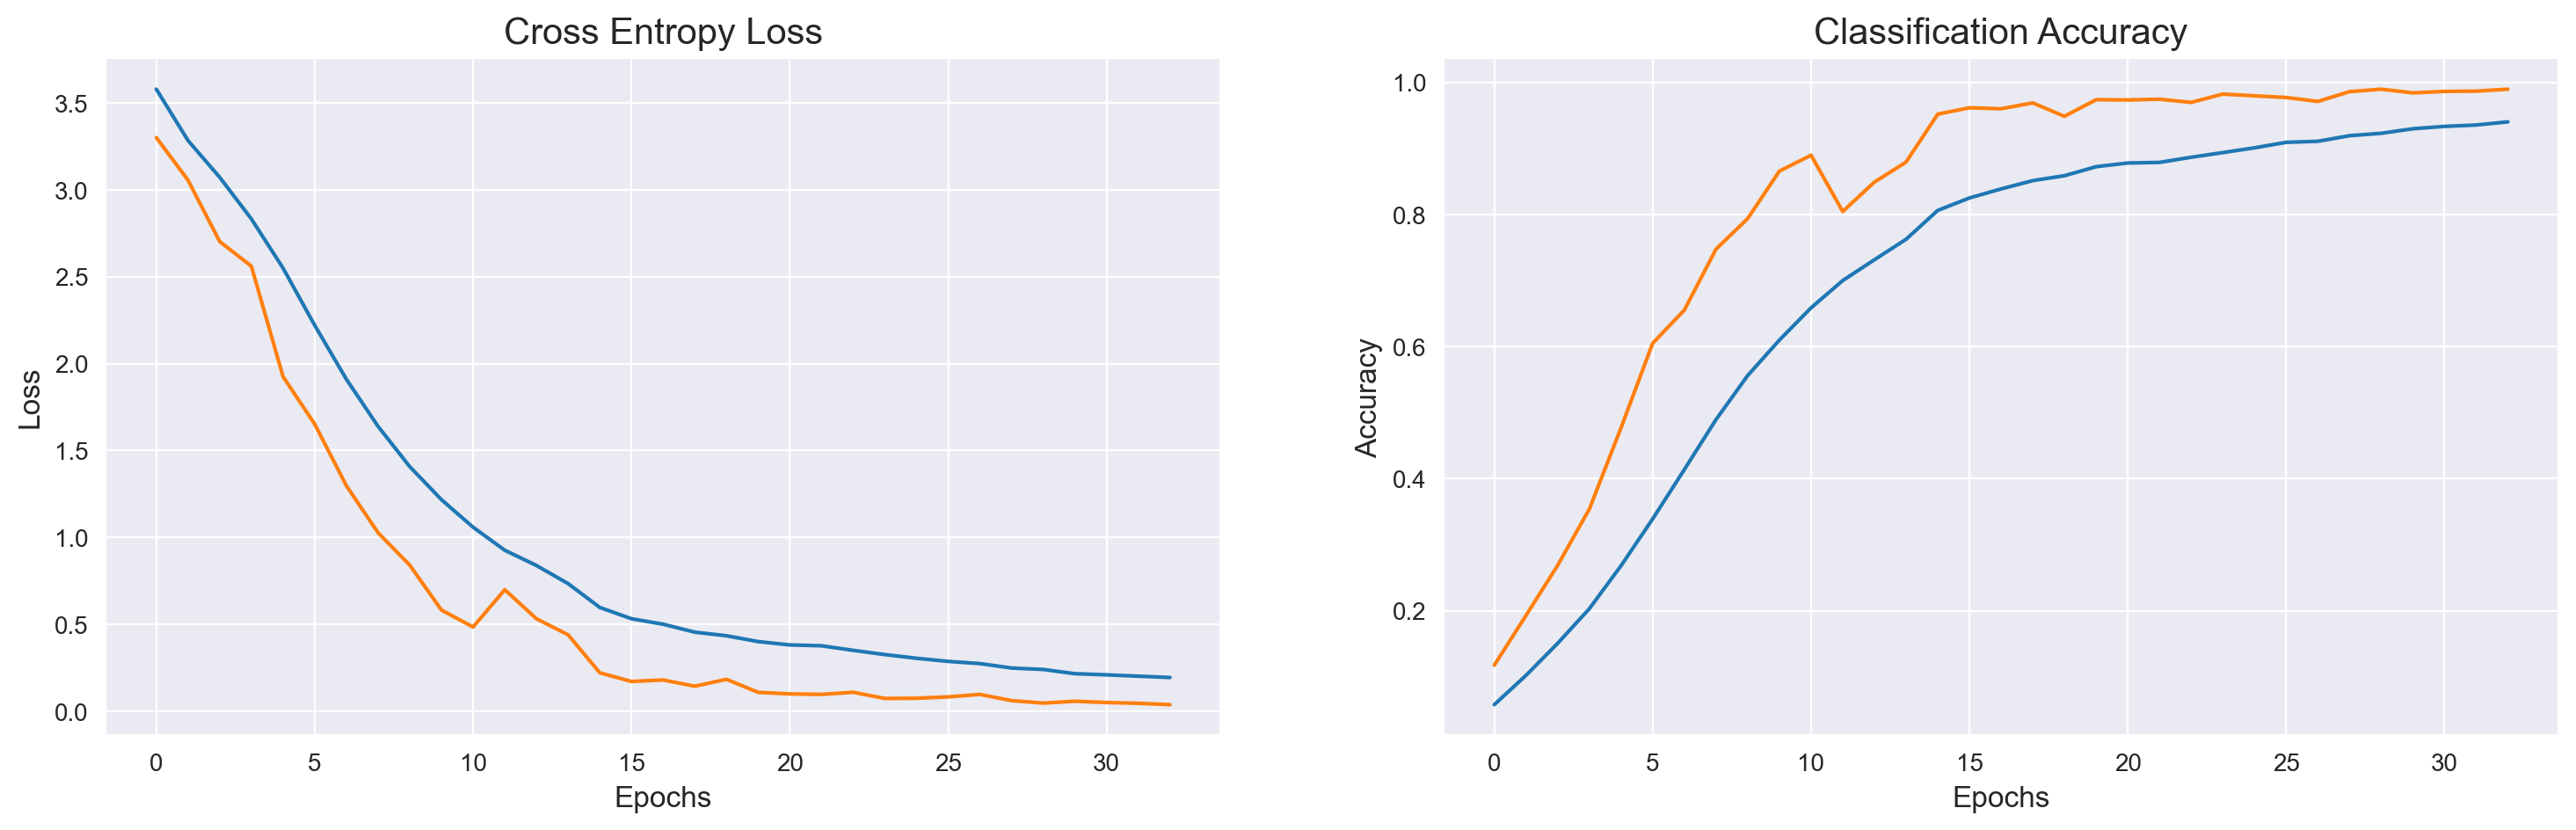

In [17]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [18]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 98.48204255104065
The Loss of the model for testing data is: 0.05223848298192024


In [19]:

p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 2671
Incorrect predicted classes: 30


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  fig.canvas.draw()
c:\Users\Dell\AppData\Local\Programs\Python\Pytho

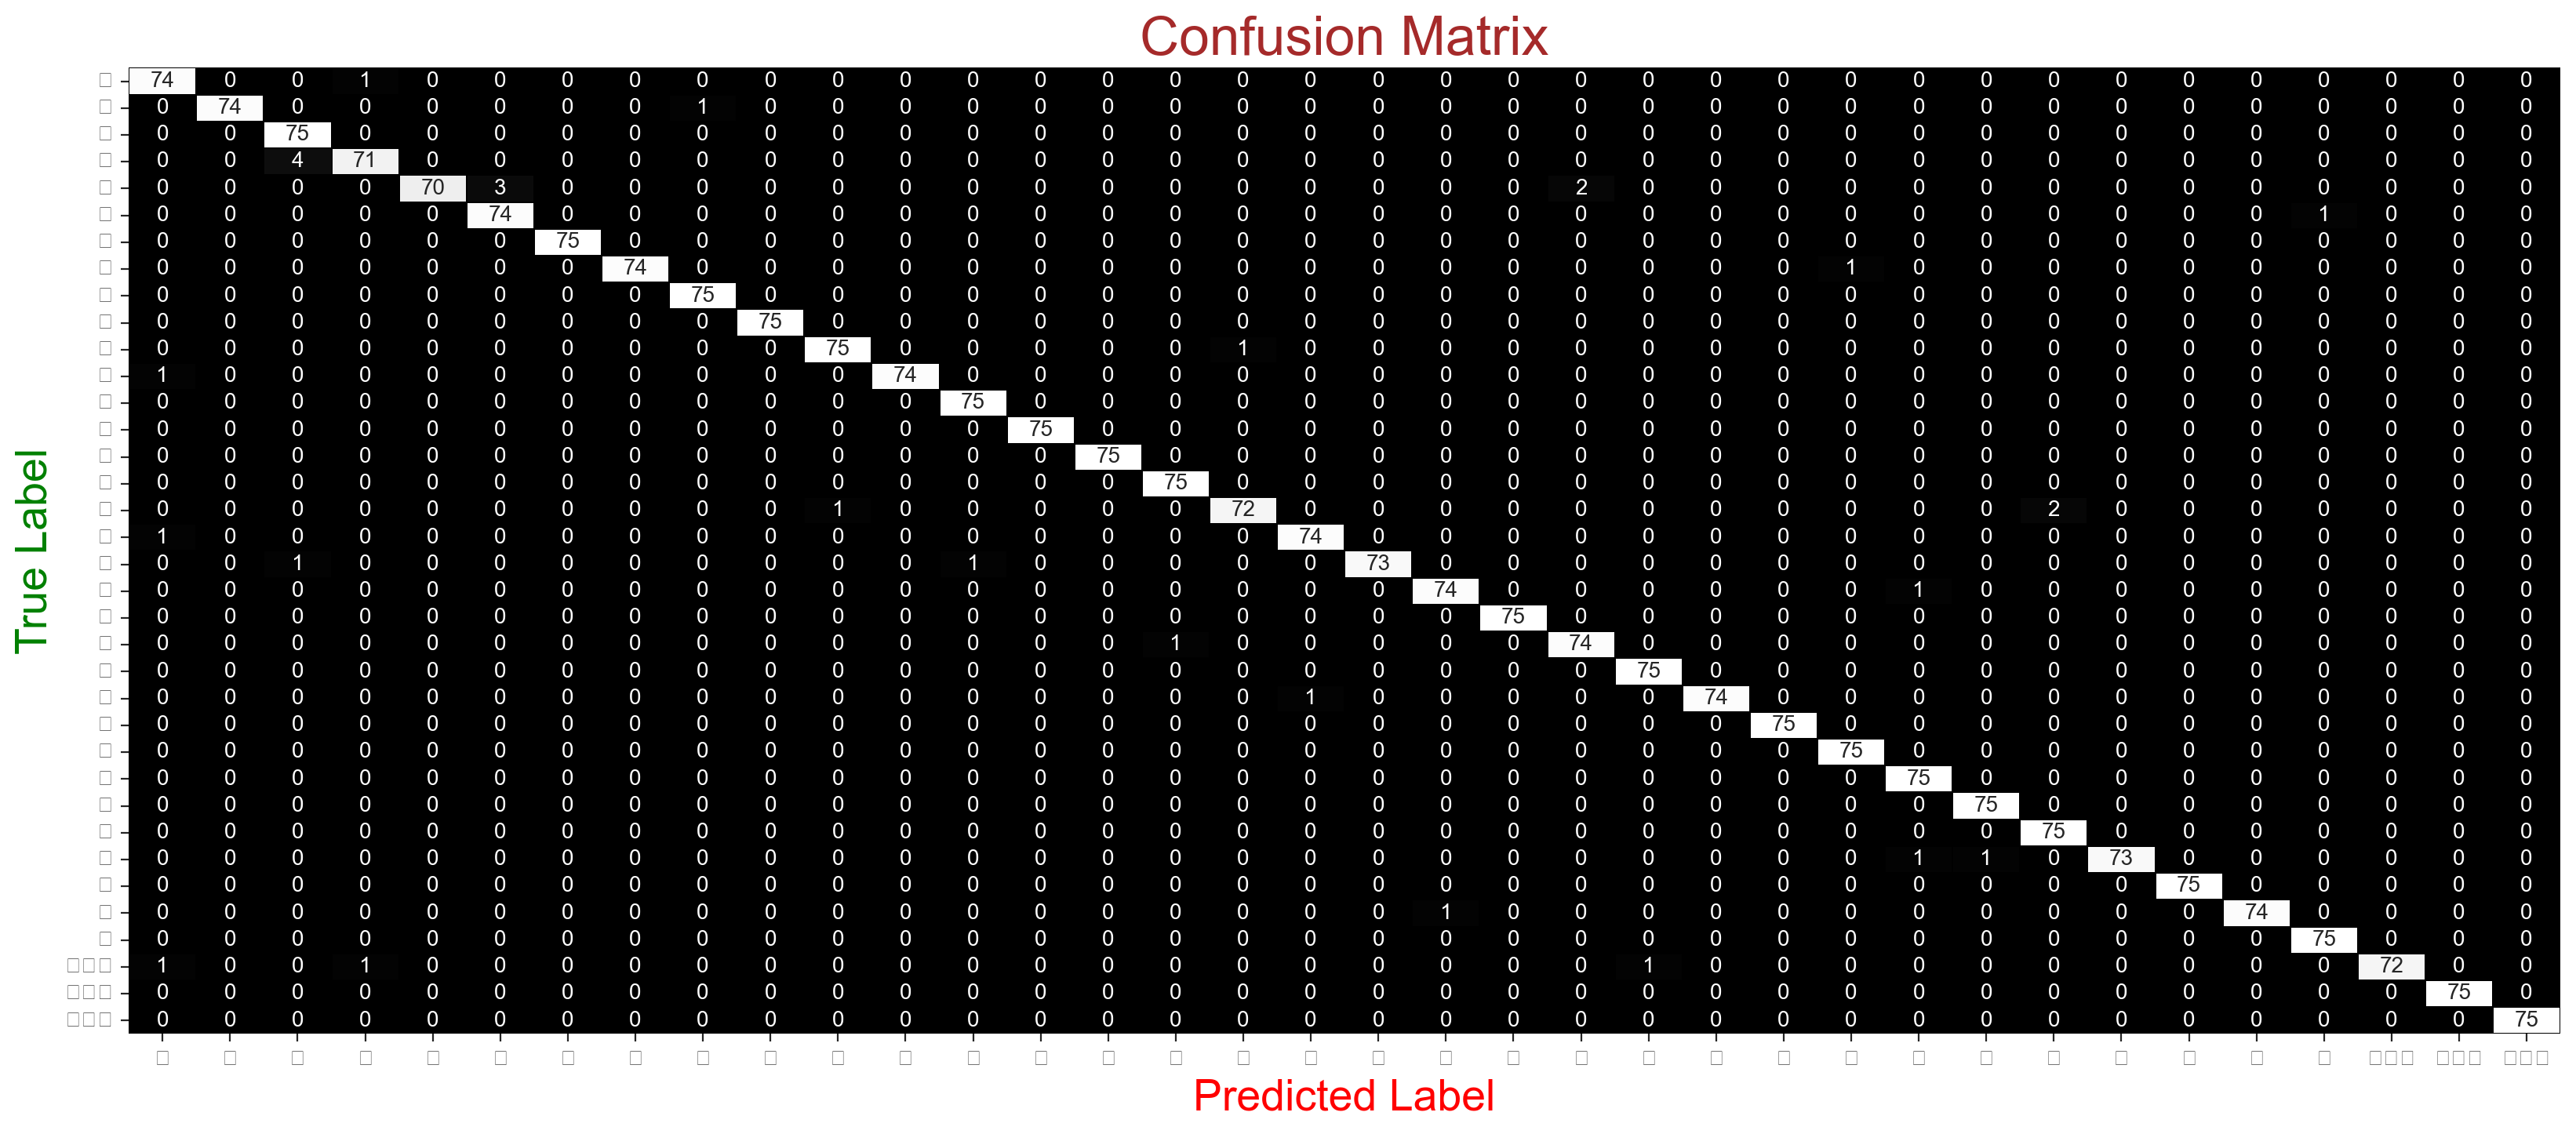

In [20]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.1, cmap = "gist_yarg_r", 
            linecolor="black", fmt='.0f', ax=ax, 
            cbar=False, xticklabels=categories.values(), 
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()








In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np

model = load_model('E:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/d33NSLmodel.h5')
labels = ["क","क्ष", "ख", "ग", "घ", "ङ", "च", "छ", "ज","ज्ञ", "झ", "ञ", "ट", "ठ", "ड", "ढ", "ण", "त", "त्र", "थ", "द", "ध", "न", "प", "फ", "ब", "भ", "म", "य", "र", "ल", "व", "श", "ष", "स", "ह"]

In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2  # OpenCV library for image processing

img_path = "C:/"  # Replace with your image path
img = image.load_img(img_path, color_mode='grayscale', target_size=(100, 100))  # Load image and convert to grayscale
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image data if necessary

predictions = model.predict(img_array)


1/1 [==============================] - 0s 72ms/step


In [42]:
predicted_class_index = np.argmax(predictions, axis=1)[0]
print(predicted_class_index)
# Get the class label associated with the predicted index
predicted_class_label = labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

19
Predicted class: थ
